# ===============================================
# Video Stutter Detection Notebook
# このノートブックは動画のカクつき（stutter）を検出・解析するための実験用です
# 実行環境（カーネル）はTestProg_video（Python 3.8.19）で行ってください
# ===============================================

In [2]:
# 必要なライブラリをインポート
import cv2          # OpenCV: 動画読み込み・画像処理用
import numpy as np  # 数値計算・配列処理用
import matplotlib.pyplot as plt  # 可視化用

In [3]:
# -----------------------------------------------
# 動画読み込み関数
# video_path: 読み込む動画ファイルのパス
# 戻り値: cv2.VideoCapture オブジェクト
# -----------------------------------------------
def load_video(video_path):
    cap = cv2.VideoCapture(video_path)
    return cap

In [4]:
# -----------------------------------------------
# カクつき（stutter）検出関数
# frames: 動画フレームのリスト
# threshold: フレーム間の差の閾値（これを超えたらカクつきと判定）
# 戻り値: カクつきが発生したフレーム番号のリスト
# -----------------------------------------------
def detect_stutter(frames, threshold=5000):
    """
    frames: リストに格納された動画フレーム (numpy array)
    threshold: 非ゼロ画素数の閾値
    """
    stutter_frames = []
    for i in range(1, len(frames)):
        # 前フレームとの差分を計算
        diff = cv2.absdiff(frames[i], frames[i-1])
        non_zero_count = np.count_nonzero(diff)

        # 閾値を超えたらカクつきとして記録
        if non_zero_count < threshold:
            stutter_frames.append(i)
    
    return stutter_frames

In [10]:
# -----------------------------------------------
# 実際の動画処理の例
# デバイス番号は 0 から順に割り当てられる
# 0: PC内蔵カメラ、1: USBカメラ、2: キャプチャボードなど
# -----------------------------------------------
video_path = r"C:\Users\HP_PC\Desktop\2025-10-02 14-25-19.mp4"  # 動画ファイルのパス
cap = load_video(video_path)      # 動画読み込み

if not cap.isOpened():
    print("Error: キャプチャデバイスを開けませんでした")
else:
    while True:
        ret, frame = cap.read()
        if not ret:  # 動画が最後まで来たら終了
            break
        
        cv2.imshow("Video Playback", frame)
        
        # 30ms 待機 → 約 33fps で再生
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break

cv2.destroyAllWindows()


In [11]:
frames = []  # フレームを格納するリスト
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:  # 動画の最後まで読み込んだら終了
        break
    frames.append(frame)  # フレームをリストに追加
cap.release()  # 動画ファイルを閉じる

Stutter detected at frames: [9, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 238, 241, 244, 247, 250, 253, 295, 298, 301, 304, 307, 310, 313, 316, 319, 322, 364, 367, 370, 409, 412, 415, 418, 421, 424, 427, 458, 461, 464, 467, 479, 482, 515, 518, 521, 524, 527, 530, 533, 536, 566, 569, 572, 575, 578, 581, 584, 587, 590, 593, 596, 964, 967, 1009, 1012, 1015, 1018, 1021, 1024, 1054, 1057, 1060, 1063, 1066, 1069, 1072, 1075, 1078, 1081, 1114, 1117, 1120, 1123, 1126, 1129, 1132, 1135, 1138, 1141, 1144, 1180, 1183, 1186, 1189, 1192, 1195, 1198, 1205, 1208, 1211, 1214, 1226, 1229, 1232, 1235, 1238, 1319]


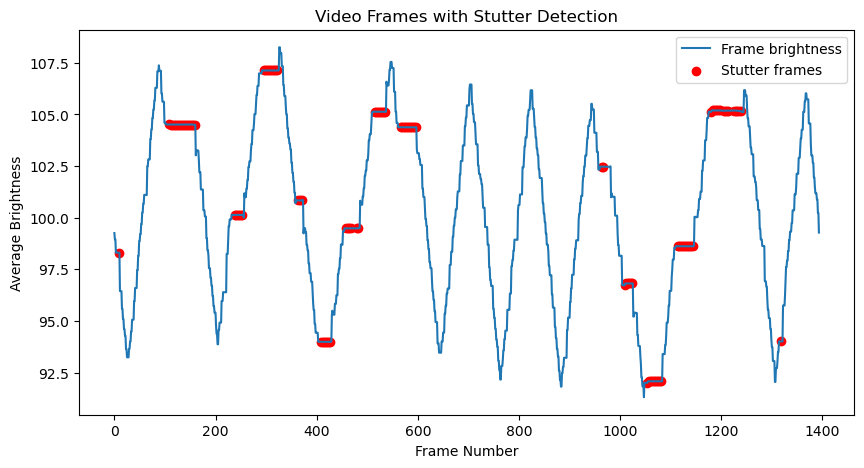

In [13]:
# -----------------------------------------------
# カクつき検出
# -----------------------------------------------
stutter_frames = detect_stutter(frames)
print(f'Stutter detected at frames: {stutter_frames}')

# -----------------------------------------------
# 結果の可視化（フレームを輝度平均値に変換）
# -----------------------------------------------

# 各フレームの平均輝度を計算
frame_values = [np.mean(cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)) for f in frames]

plt.figure(figsize=(10, 5))
plt.plot(frame_values, label="Frame brightness")  # フレームの平均輝度を折れ線で表示
plt.scatter(stutter_frames, [frame_values[i] for i in stutter_frames], color='red', label="Stutter frames")  # カクつきフレームを赤で表示
plt.title('Video Frames with Stutter Detection')
plt.xlabel('Frame Number')
plt.ylabel('Average Brightness')
plt.legend()
plt.show()
